# Rolling Stone's Top 500 Albums!

This data set, available at data.world, contains the top 500 albums of all time according to Rolling Stone magazine in 2012. I'm curious to see what the breakdown over time and by genre is. Are certain types of music and eras remembered more favorably? My suspicion is that rock and roll from the 60s through late 70s will be most favored, music coinciding with the rise of bands like The Beatles, The Rolling Stones, and the bands that followed them.

Let's see!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Currie32/500-Greatest-Albums/master/albumlist.csv", encoding= 'unicode_escape') #There was a unicode character error in the csv
df.head()

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock


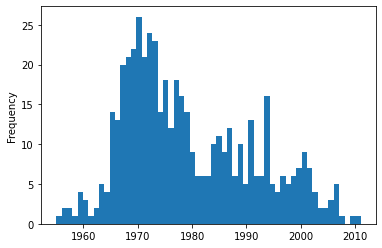

In [3]:
#It's nice we have that Genre column, let's do a quick histogram to see what we've got in there by year

df['Year'].plot(kind='hist', bins=57);


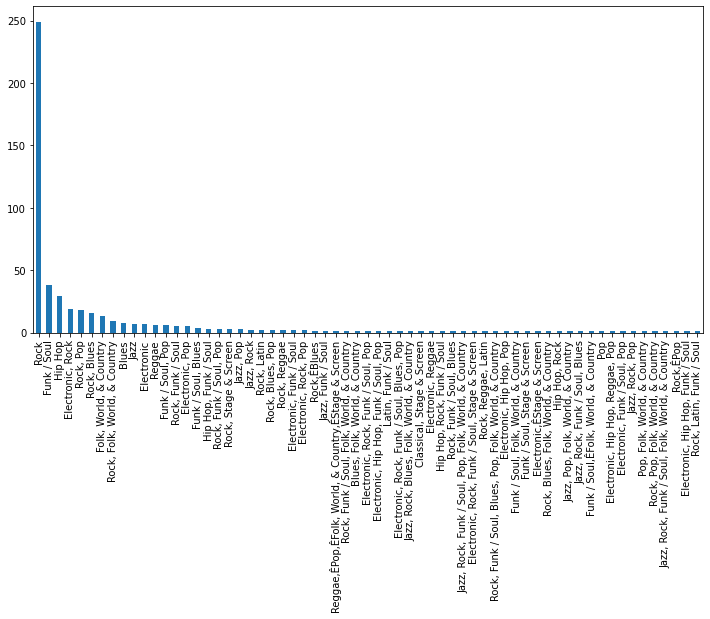

In [4]:
#df['Genre'].value_counts()
df['Genre'].value_counts().plot(kind='bar', figsize=(12,6));

That's kind of helpful. We see the bulk of the awards are late 60s through late 70s and that there's a lot of Rock recognized. Let's see if we can describe how genre changes over that time by cleaning the Genre column.

I need to clean those Genre values up a bit.

I'll tidy this data by defining an observation to be a year and genre combination. An album categorized as "Rock, Pop" in 1967 will be counted as separate observations as 2 observations, a Rubber Soul from The Beatles in 1965 will count as an observation of a Rock album being in the best and a Pop album from 1965 being in the best.

In [5]:
series = df['Genre'].replace('Funk / Soul', 'Funk/Soul', regex = True)
#We needed the regex = True to check for occurences of Funk / Soul within a larger string than "Funk / Soul"
series = series.replace('Hip Hop', 'HipHop', regex = True)
series = series.replace({',':'', ' & ':' ', 'Ê':' ' }, regex = True)
series = series.str.split(' ')
df['Genre_List']=series
df.head()

,Number,Year,Album,Artist,Genre,Subgenre,Genre_List
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock",[Rock]
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock",[Rock]
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock",[Rock]
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock",[Rock]
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock,"[Rock, Pop]"


In [6]:
# split the list of genres so that each is on its own row
genres = df.apply(lambda r: pd.Series(r['Genre_List']), axis=1).stack()

# the index of this is a multi-index of pairs (i, j), with i being the original index 
# and j being ranked genre. for example, if album 46 has genres [Rock, Pop], there will be two rows:
# (46, 0, Rock) and (46, 1, Pop)

# this line removes that second index
genres.reset_index(level=1, drop=True, inplace=True)
genres.name = 'genre'
genres



0        Rock
1        Rock
2        Rock
3        Rock
4        Rock
        ...  
495      Rock
496      Rock
497      Rock
498     Blues
499    HipHop
Name: genre, Length: 764, dtype: object

In [7]:
# join this to the original dataframe. This will create a new row for each genre. Only keep the year/genre pair
big_df = df.join(genres)[['Year', 'genre']]
big_df

,Year,genre
0,1967,Rock
1,1966,Rock
2,1966,Rock
3,1965,Rock
4,1965,Rock
...,...,...
495,1969,Rock
496,2001,Rock
497,1989,Rock
498,1971,Blues


In [8]:
# pivot to get an incidence matrix
pivot_df = big_df.pivot_table(
    index='Year',
    columns='genre',
    aggfunc=len).fillna(0)
pivot_df

genre,Blues,Classical,Country,Electronic,Folk,Funk/Soul,HipHop,Jazz,Latin,Pop,Reggae,Rock,Screen,Stage,World
Year,,,,,,,,,,,,,,,
1955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
1958,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1960,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1961,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1962,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1963,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,1.0


In [9]:
fig, ax = plt.subplots()
sum_df = pivot_df.cumsum(axis=0).
sum_df.plot(
    ax=ax, 
    logy=True, 
    legend=False)
ax.set_title("Cumulative Number of Albums by Genre")
ax.set_ylabel("# of Albums")
ax.set_xlabel("year")
ax.legend(loc=(1, 0))

SyntaxError: invalid syntax (<ipython-input-9-98e7c15f49df>, line 2)

In [ ]:
# which genres coincide per year?
corr_df = pivot_df.corr()
corr_df


In [ ]:
import seaborn as sns # fun plotting library

# create a mask of ones in the upper triangle
sns.clustermap(
    corr_df,
    vmin=-1,
    vmax=1,
    cmap='coolwarm_r',
    cbar_kws={'label': 'pearson correlation'}
)

In [ ]:
genres = list(set(series.sum()))
for i in genres:
    df[i]=0 #Let's create Genre columns to fill when a record counts as a genre
df.head()

In [ ]:
#Let's look at how much of the data was pre 1980

len(df[df['Year']<1980])

In [ ]:
%%capture
for i in range(0,len(df)):
    for j in df['Genre_List'][i]:
        (df[j])[i]=1      
df.head()

In [ ]:
#So now I can easily filter the data set by Genre. Let's see what all the HipHop albums ranked in the top 500
df[df['HipHop']==1]

We can also quickly see there are 38 HipHop albums in the top 500

In [ ]:
len(df[df['HipHop']==1])

Now I can use group by commands to extract Genre graphs over time. 

In [ ]:
df.groupby('Year').sum()['HipHop'].plot(style='.',legend=True); #I don't like the connecting lines since my data is somewhat discrete

In [ ]:
df.groupby('Year').sum()['Rock'].plot(style='.', legend=True);

In [ ]:
df.groupby('Year').sum()['Pop'].plot(style='.', color = 'blue',legend=True);

In [ ]:
df.groupby('Year').sum()['Electronic'].plot(style='.', color='red',legend=True);

A couple observations I have from these graphs:
1. It's mostly as we expected, Rock-heavy and a lot from the 60s/70s.
2. I thought it was interesting there's nearly 1 pop album per year on average.
3. Electronic appears earlier than I had thought, with 4 albums in 1977! As I wrap up exploring this, I should look up what those early Electronic albums are.

In [ ]:
df[df['Electronic']==1].sort_values(by=['Year'])

The Mothers of Invention, a Frank Zappa band. That makes sense.

Some other things I might look at in this data set include correlation of Genres. I might also be interested in looking at the rise and fall of various bands. Did certain bands need to "move out of the way" to let other greats in?

As per genre breakdown, I could pull another data set, maybe Billboard data and see how it compares. There might also be more information in gathering which "non Rock" albums made the list and understand why they're on here.